# Hugging Face Usage

#### Import package

In [ ]:
!pip install transformers diffusers torch sentencepiece
# 加入 "!" 為在 shell 中運行

In [ ]:
from transformers import pipeline
from diffusers import StableDiffusionPipeline
import torch

#### Translate pipeline

In [ ]:
translator = pipeline(
    "translation",
    model="Helsinki-NLP/opus-mt-mul-en"
    )
# 使用 Hugging Face 的 "Helsinki-NLP/opus-mt-mul-en" 模型，支援多語言翻譯成英文


Device set to use cpu


#### Stable diffusion pipeline

In [ ]:
model_id = "runwayml/stable-diffusion-v1-5"  # 這是預訓練的 Stable Diffusion 模型的名稱，來自 runwayml 提供的版本
device = "cuda" if torch.cuda.is_available() else "cpu"  # 判斷是否可以使用 GPU (CUDA)，若有則使用 GPU，否則使用 CPU

sd_pipeline = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16 if device=="cuda" else torch.float32
    )  # 根據裝置選擇適當的資料型態（float16 for GPU, float32 for CPU），然後載入模型
sd_pipeline = sd_pipeline.to(device)  # 把載入好的模型移到對應的裝置上（GPU 或 CPU）

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

#### Constructor

In [ ]:
def generate_image(user_prompt):
    # Translate prompt to English
    translation = translator(user_prompt, max_length=512)[0]['translation_text']
    print(f"Translated prompt: {translation}")

    # Generate image
    image = sd_pipeline(translation).images[0]

    # Save or display the image
    image.save("generated_image.png")  # 沒指定路徑，存於虛擬環境
    print("Image saved as generated_image.png")

#### Example usage

In [ ]:
user_prompt = "一位小女孩，手裡拿著一串有五顆草莓的糖葫蘆"
# 輸入想生成圖片的描述(指令)

generate_image(user_prompt)

Translated prompt: A little girl with five-pound sugars in her hand.


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved as generated_image.png


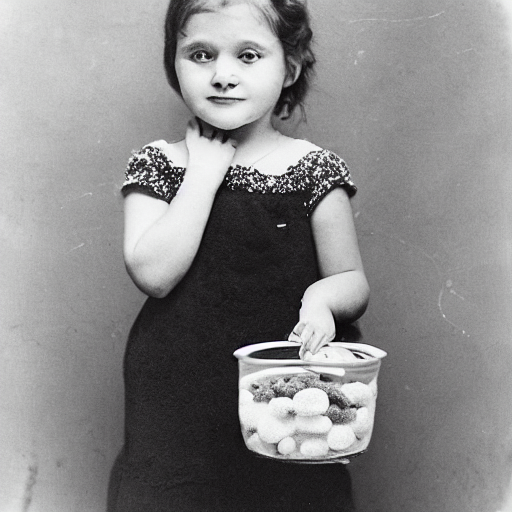

In [ ]:
from IPython.display import Image, display

display(Image(filename="generated_image.png"))  # 印出圖片